In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
def tenImages( cla ):
  plt.figure(figsize=(20,4))
  for index in np.arange(0,10):
    plt.subplot(1,10,index+1)
    plt.imshow(torch.from_numpy(cla[index][np.newaxis, :, :]).squeeze().numpy())

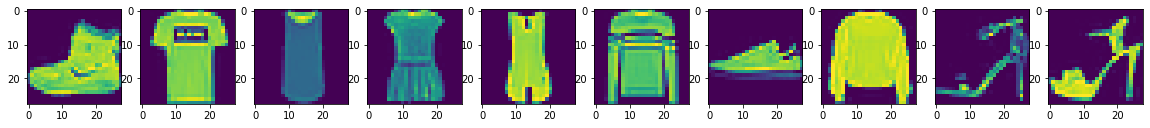

In [4]:
tenImages(train_images)

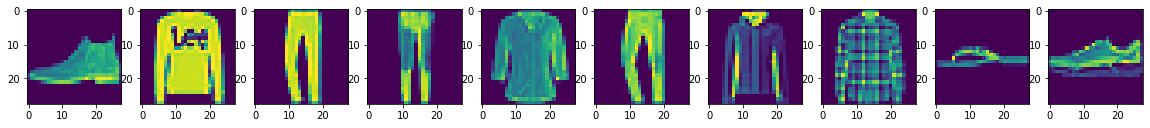

In [5]:
tenImages(test_images)

In [0]:
nsamples, nx, ny = train_images.shape
d2_train_images = train_images.reshape((nsamples,nx*ny))
tnsamples, tnx, tny = test_images.shape
d2_test_images = test_images.reshape((tnsamples,tnx*tny))

k-NN

In [7]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)
%time clf.fit(d2_train_images,train_labels)
%time clf.score(d2_test_images,test_labels)

CPU times: user 11.5 s, sys: 174 ms, total: 11.6 s
Wall time: 11.6 s
CPU times: user 15min 10s, sys: 73.2 ms, total: 15min 10s
Wall time: 15min 12s


0.8497

logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(d2_train_images)
x_test = scaler.fit_transform(d2_test_images)
logisticReg = LogisticRegression(penalty='l2',tol=0.1,solver='saga',C=0.001)
%time logisticReg.fit(x_train,train_labels)
%time predictions = logisticReg.predict(x_test)
%time scorelr = logisticReg.score(x_test,test_labels)
print(scorelr)

CPU times: user 13.3 s, sys: 3.99 ms, total: 13.3 s
Wall time: 13.3 s
CPU times: user 41.3 ms, sys: 24 ms, total: 65.3 ms
Wall time: 35.7 ms
CPU times: user 43 ms, sys: 8 ms, total: 51 ms
Wall time: 25.7 ms
0.8233


support vector machines (with linear kernels)

In [9]:
from sklearn import svm
ntr = d2_train_images.shape[0]
ntr1 = 12000
nts1 = 2000
Iperm = np.random.permutation(ntr1)
x_train_small = d2_train_images[Iperm[:ntr1],:]
y_train_small = train_labels[Iperm[:ntr1]]
Iperm = np.random.permutation(nts1) 
x_test_small = d2_test_images[Iperm[:nts1],:]
y_test_small = test_labels[Iperm[:nts1]]

svc = svm.SVC(probability=False,kernel="linear",C=2.8,gamma=0.0073)
%time svc.fit(x_train_small,y_train_small)
%time yhat = svc.predict(x_test_small)

%time acc = np.mean(yhat == y_test_small)
print(acc)

CPU times: user 2min 32s, sys: 25.9 ms, total: 2min 32s
Wall time: 2min 32s
CPU times: user 10.1 s, sys: 2 ms, total: 10.1 s
Wall time: 10.2 s
CPU times: user 708 µs, sys: 0 ns, total: 708 µs
Wall time: 568 µs
0.804


support vector machines (with rbf kernels)

In [10]:
svcrbf = svm.SVC(probability=False,kernel="rbf",C=5,decision_function_shape='ovo',max_iter=1000)
%time svcrbf.fit(x_train_small,y_train_small)
%time yhat_rbf = svcrbf.predict(x_test_small)
acc_rbf = np.mean(yhat_rbf == y_test_small)
print(acc_rbf)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


CPU times: user 40.8 s, sys: 6.99 ms, total: 40.8 s
Wall time: 40.9 s
CPU times: user 13.1 s, sys: 998 µs, total: 13.1 s
Wall time: 13.1 s
0.878
